In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
from divers import plot_confusion_matrix

In [5]:
import sys
sys.path.append('./sompyLatmos/')     # Chemin du package
from sompy import SOMFactory
from sompy import SOMData

C:\Users\user\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


**graine aléatoire** (Pour assurer la reproductivié de l'expérience)

In [6]:
#seed = 0 
#np.random.seed(seed)

### Chargement et mise en forme des données

In [7]:
#from lettresZEtF import splitNlabs,  
from lettresZEtF import Zcreadata, Fcreadata
from lettresZEtF import lettreplot
from sklearn.metrics import label_ranking_average_precision_score as rank

**Choix de la répartition et du nombre de données** 

In [8]:
N  = 500; # Taille des donnees
#strChoixDeLaForme = 'F'
strChoixDeLaForme = 'Z'

#### Creation du jeu de donnees d'apprentissage et de leurs structures

In [9]:
if strChoixDeLaForme == 'Z':
    classnames = ['T','B','D'];
    # 'T' correspond à la bar du haut comme Top,
    # 'B', à celle du bas comme Bottom et
    # 'D' à la Diagonale
    data, data_labels, comp_names = Zcreadata(N,
                                   classnames=classnames)
elif strChoixDeLaForme == 'F':
    classnames = ['T','M','L'];
    # 'T' correspond à la bar du haut 
    # 'M', à celle du Milieu et
    # 'L' à la bar gauche, comme Left
    data, data_labels, comp_names = Fcreadata(N, 
                                   classnames=classnames)
masque = np.ones(data.shape[1])

In [10]:
masque

array([1., 1.])

#### Affichage des données

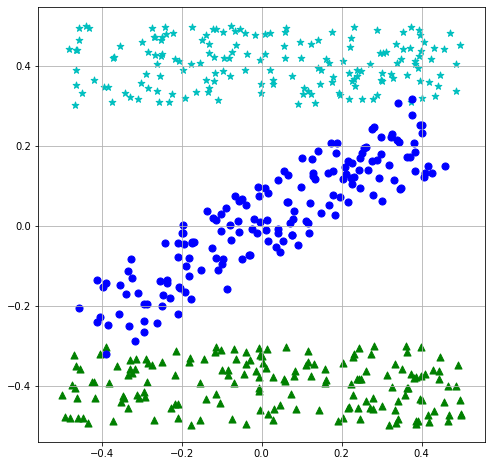

In [11]:
plt.figure(figsize=(8,8))
lettreplot(data)
plt.grid()
plt.axis('equal') ;

**Création d'un objet sData**

In [12]:
sData = SOMData(data,      # les données 
                comp_names,# les noms des variables
                data_labels,# les potentielles étiquettes 
                normalization = "var")

**Affichage des T-SNE**

In [13]:
#sData.plot_tsne()

### Création de la carte et apprentissage

#### Création d'une carte topologique (objet sm)

In [14]:
#mapsize=(1,30) 
#mapsize=(1,10) 
mapsize=(5,6) 

#mapsize=(3,7)   # a changer -> [nombre de lignes, nombre de colonnes]
sm = SOMFactory().build(sData, 
                        mapsize=mapsize,
                        normalization = None, 
                        initialization='pca', 
                        #initialization='random', 
                        neighborhood ='gaussian',
                        #neighborhood ='bubble',
                        radius_train ='linear', 
                        #radius_train ='power_series', 
                        #radius_train ='inverse_of_time', 
                        name='une lettre',
                        #lattice='rect',
                        lattice='hexa',
                        mask=masque,
                        components_to_plot=((0,1),))

#### Entraînement de la carte

Training ...
 Rough training...
radius_ini: 5.000 , radius_final: 1.250, trainlen: 20

[0.8047,0.7640], 
[0.7511,0.6760], 
[0.7338,0.6080], 
[0.7117,0.5400], 
[0.6899,0.5280], 
[0.6711,0.5800], 
[0.6512,0.5700], 
[0.6292,0.5680], 
[0.6051,0.5800], 
[0.5790,0.5960], 
[0.5513,0.6060], 
[0.5213,0.5880], 
[0.4896,0.5800], 
[0.4555,0.5780], 
[0.4189,0.5800], 
[0.3813,0.5820], 
[0.3420,0.5840], 
[0.3022,0.5820], 
[0.2628,0.5760], 
[0.2263,0.5380], 


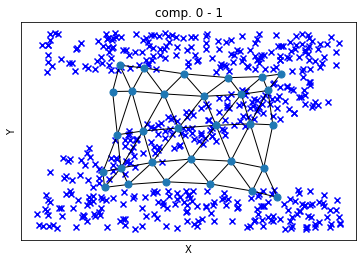

Finetune training
radius_ini: 1.250 , radius_final: 0.100, trainlen: 50

[0.2264,0.5340], 
[0.2213,0.5300], 
[0.2172,0.5340], 
[0.2129,0.5240], 
[0.2086,0.5200], 
[0.2043,0.5160], 
[0.2005,0.5160], 
[0.1969,0.5100], 
[0.1931,0.5080], 
[0.1895,0.5040], 
[0.1855,0.5080], 
[0.1816,0.5120], 
[0.1781,0.5100], 
[0.1748,0.5180], 
[0.1713,0.5180], 
[0.1675,0.5260], 
[0.1636,0.5320], 
[0.1605,0.5320], 
[0.1573,0.5320], 
[0.1545,0.5280], 
[0.1512,0.5220], 
[0.1486,0.5140], 
[0.1466,0.5140], 
[0.1447,0.5180], 
[0.1429,0.5140], 
[0.1414,0.5080], 
[0.1399,0.5120], 
[0.1387,0.5060], 
[0.1373,0.5060], 
[0.1360,0.5120], 
[0.1349,0.5100], 
[0.1337,0.5040], 
[0.1326,0.5080], 
[0.1317,0.5060], 
[0.1307,0.5160], 
[0.1294,0.5260], 
[0.1280,0.5260], 
[0.1266,0.5240], 
[0.1255,0.5180], 
[0.1248,0.5260], 
[0.1239,0.5320], 
[0.1232,0.5380], 
[0.1223,0.5280], 
[0.1213,0.5140], 
[0.1208,0.5140], 
[0.1205,0.5140], 
[0.1204,0.5180], 
[0.1204,0.5180], 
[0.1204,0.5180], 
[0.1204,0.5180], 


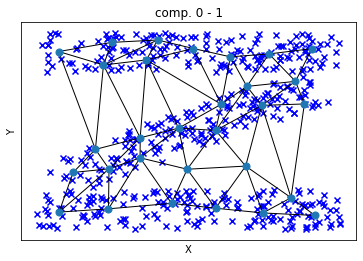

In [15]:
sm.train(n_job=1, 
         verbose=None, 
         shared_memory=True,
         train_rough_len=20, 
         train_rough_radiusin=5,
         train_rough_radiusfin=1.25,
         train_finetune_len=50,
         train_finetune_radiusin=1.25,
         train_finetune_radiusfin=0.1,
         watch_evolution = False)

**Affichage des T-SNE**

In [46]:
err = np.array([[0.8047,0.7640], 
[0.7511,0.6760], 
[0.7338,0.6080], 
[0.7117,0.5400], 
[0.6899,0.5280], 
[0.6711,0.5800], 
[0.6512,0.5700], 
[0.6292,0.5680], 
[0.6051,0.5800], 
[0.5790,0.5960], 
[0.5513,0.6060], 
[0.5213,0.5880], 
[0.4896,0.5800], 
[0.4555,0.5780], 
[0.4189,0.5800], 
[0.3813,0.5820], 
[0.3420,0.5840], 
[0.3022,0.5820], 
[0.2628,0.5760], 
[0.2263,0.5380],
[0.2264,0.5340], 
[0.2213,0.5300], 
[0.2172,0.5340], 
[0.2129,0.5240], 
[0.2086,0.5200], 
[0.2043,0.5160], 
[0.2005,0.5160], 
[0.1969,0.5100], 
[0.1931,0.5080], 
[0.1895,0.5040], 
[0.1855,0.5080], 
[0.1816,0.5120], 
[0.1781,0.5100], 
[0.1748,0.5180], 
[0.1713,0.5180], 
[0.1675,0.5260], 
[0.1636,0.5320], 
[0.1605,0.5320], 
[0.1573,0.5320], 
[0.1545,0.5280], 
[0.1512,0.5220], 
[0.1486,0.5140], 
[0.1466,0.5140], 
[0.1447,0.5180], 
[0.1429,0.5140], 
[0.1414,0.5080], 
[0.1399,0.5120], 
[0.1387,0.5060], 
[0.1373,0.5060], 
[0.1360,0.5120], 
[0.1349,0.5100], 
[0.1337,0.5040], 
[0.1326,0.5080], 
[0.1317,0.5060], 
[0.1307,0.5160], 
[0.1294,0.5260], 
[0.1280,0.5260], 
[0.1266,0.5240], 
[0.1255,0.5180], 
[0.1248,0.5260], 
[0.1239,0.5320], 
[0.1232,0.5380], 
[0.1223,0.5280], 
[0.1213,0.5140], 
[0.1208,0.5140], 
[0.1205,0.5140], 
[0.1204,0.5180], 
[0.1204,0.5180], 
[0.1204,0.5180], 
[0.1204,0.5180]])

In [17]:
err.shape

(70, 2)

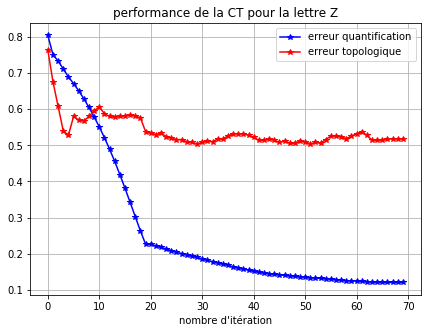

In [47]:
plt.figure(figsize=(7,5))
plt.title("performance de la CT pour la lettre "+ strChoixDeLaForme)
plt.plot(err[:,0], 'b-*', label='erreur quantification' )
plt.plot(err[:,1], 'r-*', label='erreur topologique')
plt.xlabel("nombre d'itération")
plt.legend()
plt.grid()

In [19]:
#sm.plot_tsne()

#### Affichages graphiques :

 - **Affichage de la carte**

In [20]:
from mapview import View2D
view2D  = View2D(16,16,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;

<Figure size 432x288 with 0 Axes>

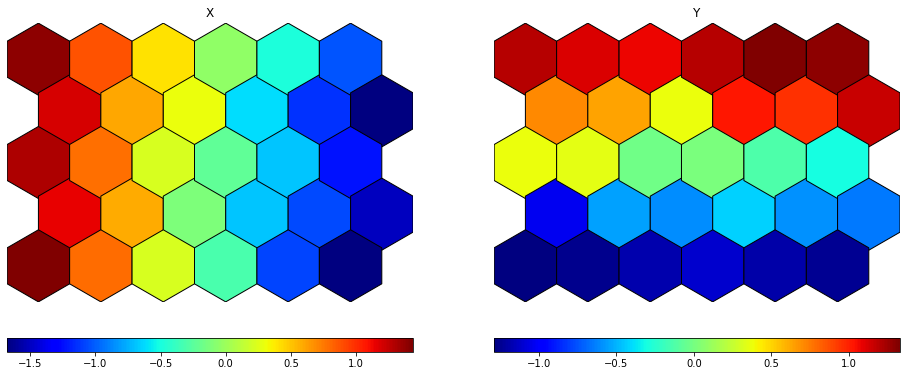

In [21]:
view2D.show(sm, col_sz=2, which_dim="all", denormalize=True) ; 

 - **Affichage de la carte avec etiquettes (les indices des neurones)**

<Figure size 432x288 with 0 Axes>

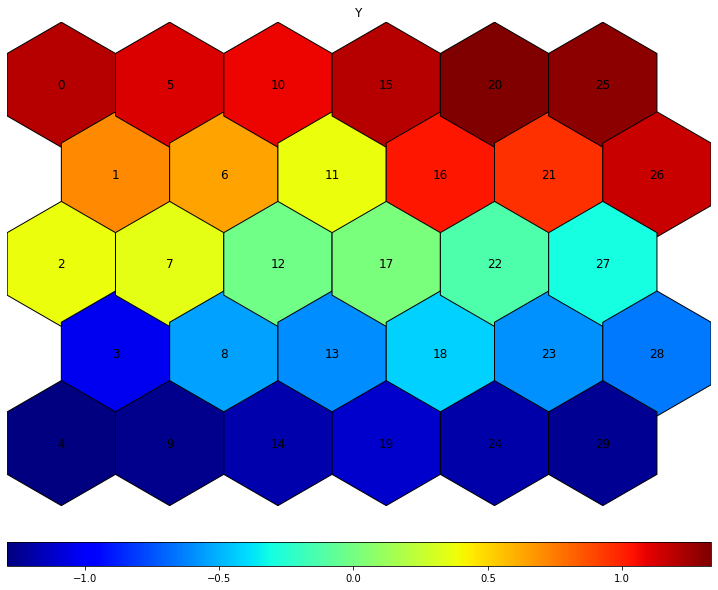

In [22]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=None,anotate=True, col_sz=1, which_dim=1, denormalize=True, labelsize=12) ; 

<Figure size 432x288 with 0 Axes>

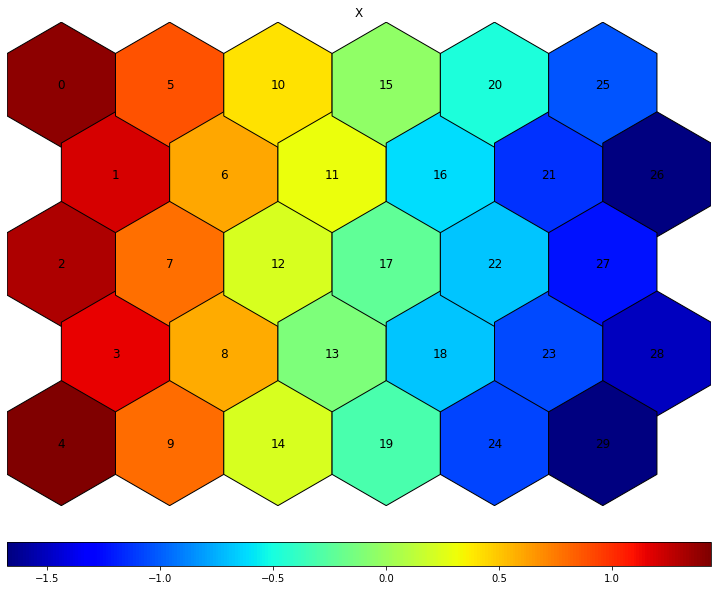

In [23]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=None,anotate=True, col_sz=1, which_dim=0, denormalize=True, labelsize=12) ; 

 - **Affichage de la carte avec les cardinalités**

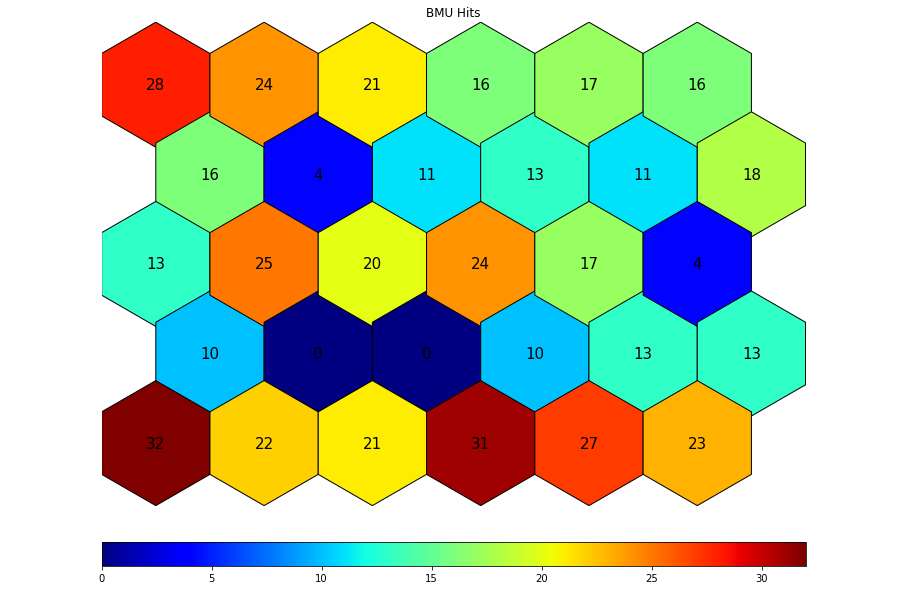

In [24]:
from bmuhits import BmuHitsView
vhts  = BmuHitsView(16,10,"Hits by neuron",text_size=20)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=15, logaritmic=False)

 - **Affichage de la carte (distances entre les référents/neurones)**

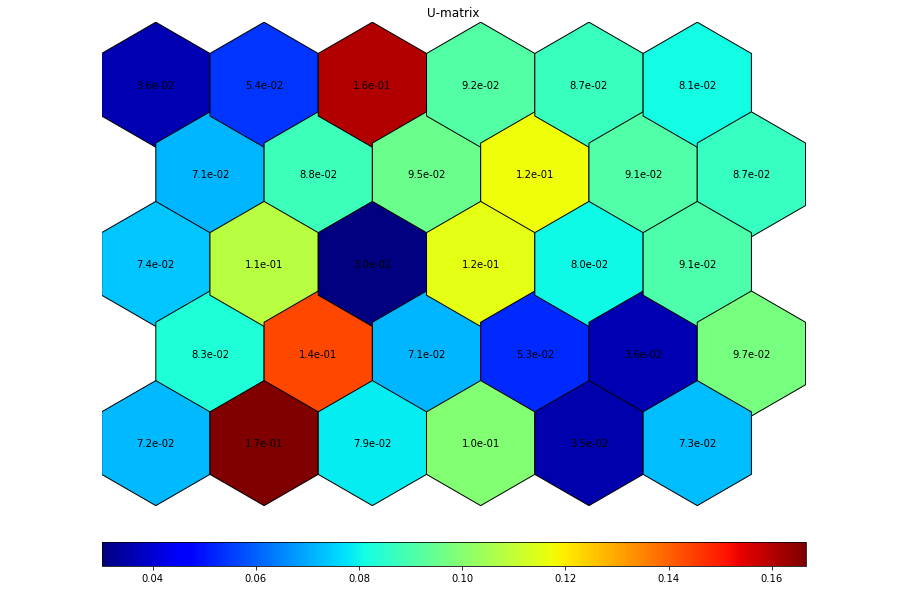

In [25]:
from umatrix import UMatrixView
umat = UMatrixView(16,10,"Unified Distance Matrix", text_size=20)
umat.show(sm) ;

#### Evaluer l'apprentissage de la carte

* **Calcul des erreurs globales**

In [26]:
topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error  = %s\nQuantization error = %s" % (topographic_error, quantization_error))

Topographic error  = 0.518
Quantization error = 0.12039781830327535


 * **Coefficient de Silhouette**
(Pour cette partie on pourra voir la définition du [coefficient de Silhouette](https://fr.wikipedia.org/wiki/Silhouette_(clustering)) sur wikipedia ainsi que la documentation sur le site de scikit learn pour laquelle il y a un [tutoriel sur kmoyennes et silouhette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html))    
En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. 

In [27]:
# sm._bmu = sm._bmu[0].astype(int)

In [28]:
silhouette_avg = silhouette_score(sm._data, sm._bmu[0].astype(int))
silhouette_avg

0.35609297731784845

In [29]:
sample_silhouette_values = coefficientSilhouette = silhouette_samples(sData._data, sm._bmu[0].astype(int))
#sample_silhouette_values

#### Labellisation des neurones référents à partir des labels des données

In [30]:
sm.node_labels_from_data(sData)

In [31]:
neuron_labels = np.array(sm.node_labels)
print(neuron_labels)

['T' 'D' 'D' 'B' 'B' 'T' 'D' 'D' 'Nan' 'B' 'T' 'D' 'D' 'Nan' 'B' 'T' 'T'
 'D' 'D' 'B' 'T' 'T' 'D' 'D' 'B' 'T' 'T' 'D' 'D' 'B']


 - **Affichage de la carte avec etiquettes (les votes)**

In [32]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=4, which_dim=0, denormalize=True)

<Figure size 432x288 with 0 Axes>

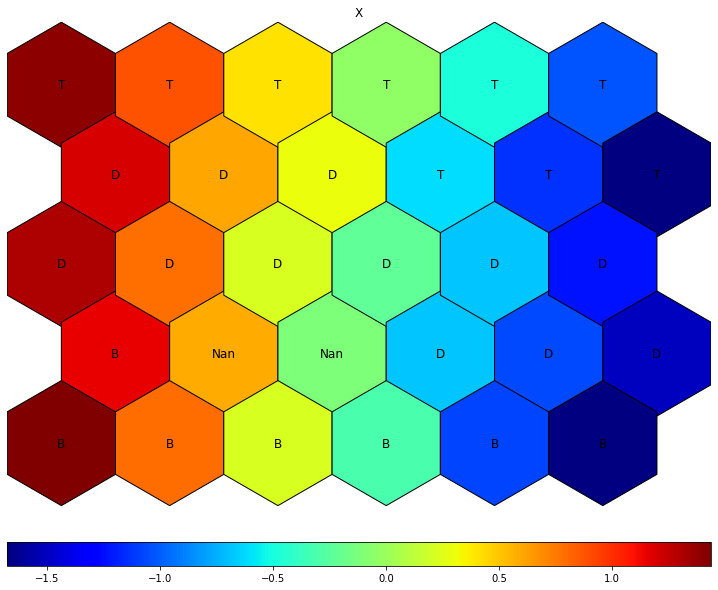

In [33]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=0, denormalize=True,labelsize=12) ; 

In [34]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=2, which_dim=1, denormalize=True)

<Figure size 432x288 with 0 Axes>

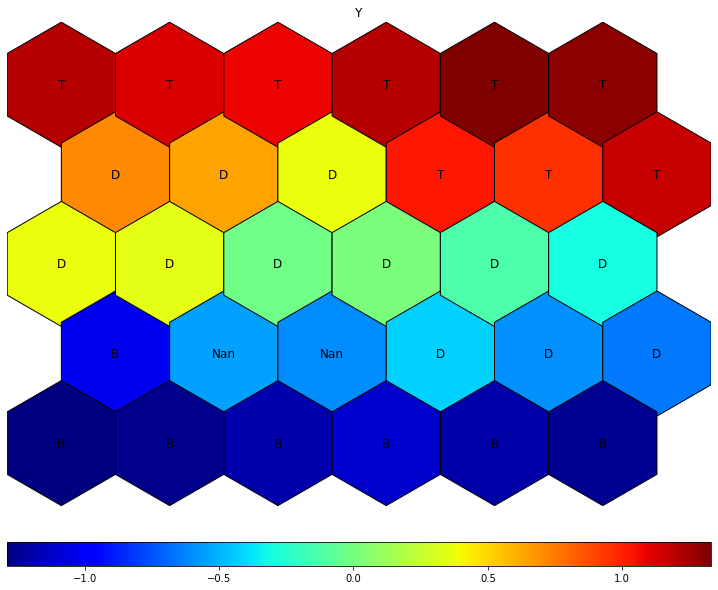

In [35]:
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=1, denormalize=True,labelsize=12) ; 

In [36]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=4, which_dim="all", denormalize=True)

<Figure size 432x288 with 0 Axes>

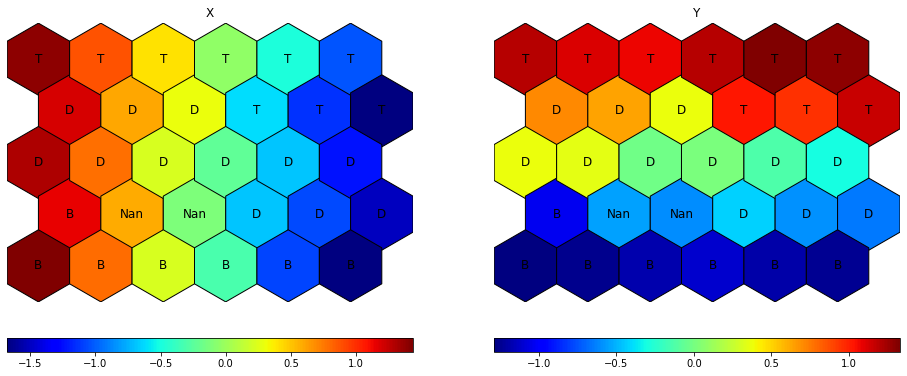

In [37]:
view2D  = View2D(16,16,
                 "lettre "+strChoixDeLaForme,
                 text_size=10)
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=2, which_dim="all", denormalize=True, labelsize=12) ;

#### Classification Ascendante Hiérarchique

 - **Affichage du dendrogramme des référents**

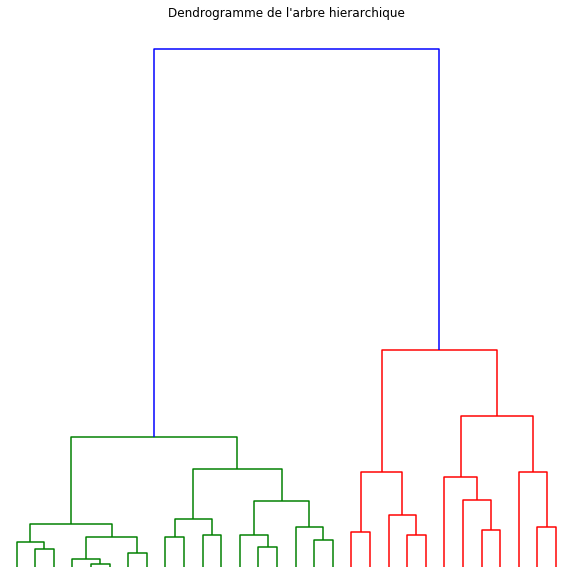

In [38]:
from dendrogram import DendrogramView
dendrogram = DendrogramView(10,10,
                            "Dendrogramme de l'arbre hierarchique",
                            text_size = 10)
dendrogram.show(sm) ; 

 - **Affichage de la carte (classes de la CAH)**

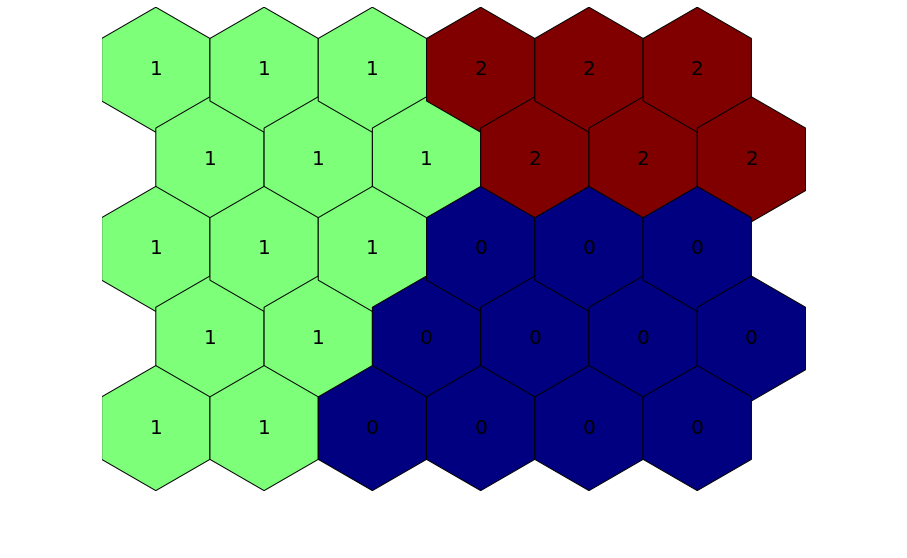

In [39]:
from hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(16,10,"Clustering",text_size=20)
a=hits.show(sm,labelsize=20)

#### Un peu de supervisé (pas toujours possible)
Comme les données sont associées à des classes, nous allons en profiter pour voir la correspondance entre les classes issues de la carte (déduites uniquement des entrées de la carte) et celles fournies avec les données.    
**On rappelle qu'il s'agit d'un algorithme non supervisé.**    
Ainsi, on ne prend pas en compte les classes lors de l'apprentissage.    
**On cherche donc à évaluer la capacité de la carte à discriminer ces classes. Cela ne pourra être fait que si les données des différentes classes sont bien distinctes dans l'espace des données (i.e. les entrées de la carte).** 

**Détermination des indices des classes estimées et désirées**

On ajoute la classe de rejet

In [40]:
classnames_ = classnames
classnames_.append('Nan')
classnames_ = np.array(classnames_)
classnames_

array(['T', 'B', 'D', 'Nan'], dtype='<U3')

Détermination des indices des classes désirées

In [41]:
_, classes_desirees = np.where(data_labels[:,None]==np.array(classnames)[None,:])
#classes_desirees

Par précaution, on recalcule les etiquettes des neurones

In [42]:
# calcul des BMU (au cas où)
sm._bmu=sm.find_bmu(sm._data) 
# camcul des etiquettes pour les neurones (votes)
sm.node_labels_from_data(sData)
# récupération des etiquetes
neuron_labels = np.array(sm.node_labels)

Détermination des indices des classes estimées

In [43]:
# classes esimees
data_labels_estim = neuron_labels[sm._bmu[0].astype(int)]
_, classes_estimees = np.where(data_labels_estim[:,None]==np.array(classnames)[None,:])
#classes_estimees

la qualité de classification

In [44]:
(classes_estimees==classes_desirees).sum()/len(classes_desirees)*100

99.0

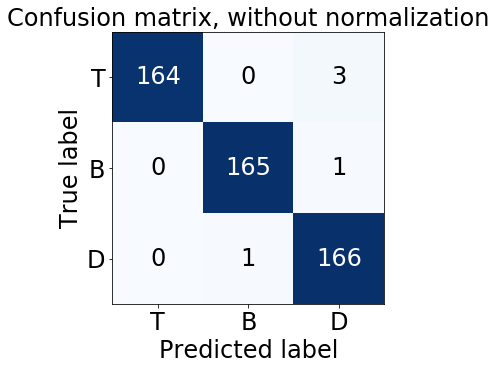

In [45]:
plt.figure(figsize=(5,5)) 
plot_confusion_matrix(classes_desirees, classes_estimees, classnames_,
                          title='',fontsize=24) ;